In [3]:
import pandas as pd
df = pd.read_parquet('./datasets/aadyasingh55_twitter.parquet')
df

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
416804,that was what i felt when i was finally accept...,1
416805,i take every day as it comes i m just focussin...,4
416806,i just suddenly feel that everything was fake,0
416807,im feeling more eager than ever to claw back w...,1


In [23]:
substring = "i feel my portfolio demonstrates how eager i am to learn but some who know me better might "
df[df["text"].str.contains(substring, case=False, na=False)]

,text,label
5948,i feel my portfolio demonstrates how eager i a...,1


# Google's go-emotions dataset

https://research.google/blog/goemotions-a-dataset-for-fine-grained-emotion-classification/

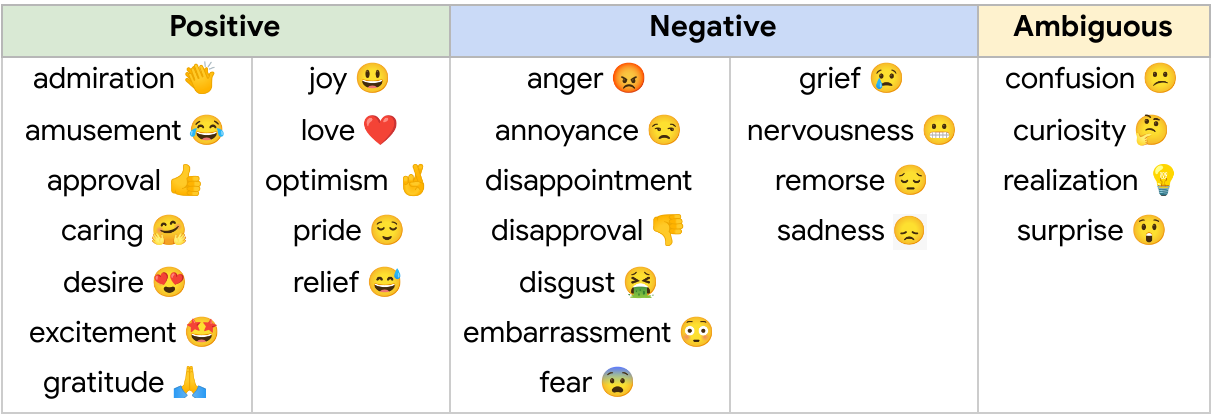

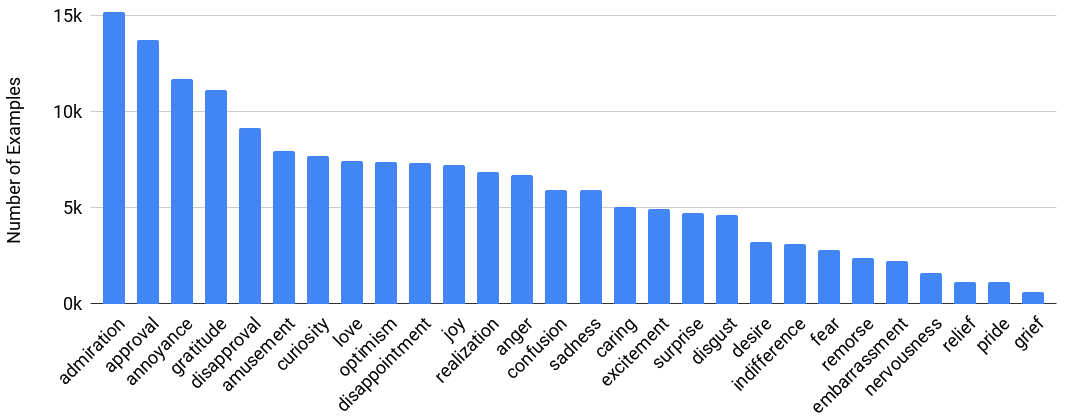

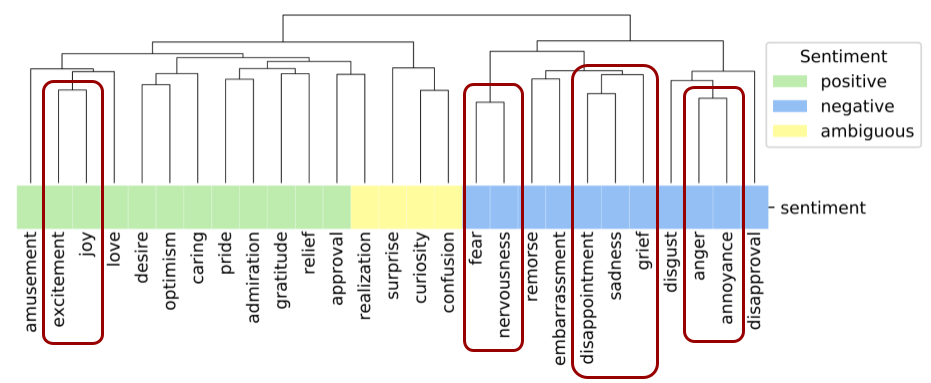

In [74]:
from datasets import load_dataset
dataset = load_dataset("google-research-datasets/go_emotions")

In [75]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [76]:
dataset['train'][0]

{'text': "My favourite food is anything I didn't have to cook myself.",
 'labels': [27],
 'id': 'eebbqej'}

In [77]:
# labels
dataset['train'].features['labels'].feature.names

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [78]:
dataset['train'][:10]

{'text': ["My favourite food is anything I didn't have to cook myself.",
  'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead',
  'WHY THE FUCK IS BAYLESS ISOING',
  'To make her feel threatened',
  'Dirty Southern Wankers',
  "OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass Broncos fans circa December 2015.",
  'Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝',
  'We need more boards and to create a bit more space for [NAME]. Then we’ll be good.',
  'Damn youtube and outrage drama is super lucrative for reddit',
  'It might be linked to the trust factor of your friend.'],
 'labels': [[27], [27], [2], [14], [3], [26], [15], [8, 20], [0], [27]],
 'id': ['eebbqej',
  'ed00q6i',
  'eezlygj',
  'ed7ypvh',
  'ed0bdzj',
  'edvnz26',
  'ee3b6wu',
  'ef4qmod',
  'ed8wbdn',
  'eczgv1o']}

# Function to show frequency of each emotion

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [80]:
# combine train/validation/test
train_df = dataset['train'].to_pandas()
val_df = dataset['validation'].to_pandas()
test_df = dataset['test'].to_pandas()

combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
display(len(combined_df))
combined_df.head()

54263

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


https://github.com/google-research/google-research/tree/master/goemotions
</br>
GoEmotions is a corpus of 58k carefully curated comments extracted from Reddit, with human annotations to 27 emotion categories or Neutral.=
- Number of examples: 58,009.
- Number of labels: 27 + Neutral.
- Maximum sequence length in training and evaluation datasets: 30.

On top of the raw data, we also include a version filtered based on reter-agreement, which contains a train/test/validation split:
- Size of training dataset: 43,410.
- Size of test dataset: 5,427.
- Size of validation dataset: 5,426.

In [81]:
train_df.shape

(43410, 3)

In [82]:
val_df.shape

(5426, 3)

In [83]:
test_df.shape

(5427, 3)

In [84]:
len(train_df) + len(val_df) + len(test_df)

54263

In [121]:
def show_freq_graph(emotions_list):
    # flatten labels
    all_labels = [label for labels in emotions_list for label in labels]

    # counter for each label
    label_counts = Counter(all_labels)
    
    # order in desc order
    sorted_freq = dict(label_counts.most_common())


    # Plot the frequencies
    plt.figure(figsize=(12, 6))
    bars = plt.bar(sorted_freq.keys(), sorted_freq.values(), color='skyblue')
    plt.xlabel('Label')
    plt.ylabel('Number of examples')
    plt.title('Label Frequency in GoEmotions Dataset (Train + Valid + Test)')
    plt.xticks(range(len(sorted_freq)), sorted_freq.keys(), rotation=90)  # Rotate labels for readability

    # Add frequency numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    plt.show()

In [86]:
# label names
emotions_str = dataset['train'].features['labels'].feature.names

In [87]:
# labels changed from numbers to string
labels_str = combined_df['labels'].apply(lambda labels: [emotions_str[label] for label in labels])

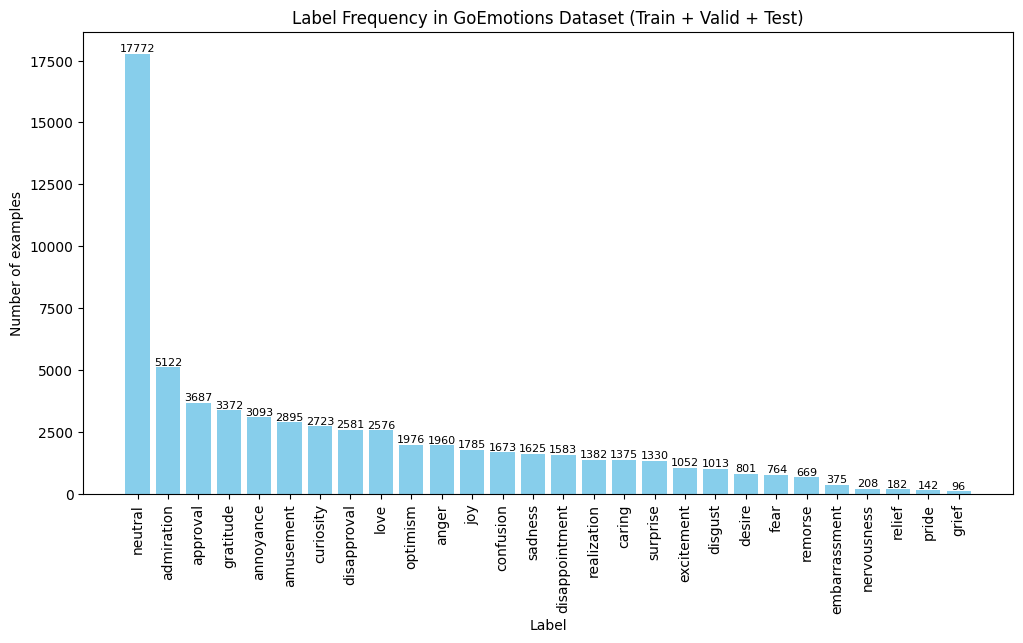

In [122]:
show_freq_graph(labels_str)

# Clean dataset
- add data augmentation (textattack) ONLY on training dataset so that the the dataset is less skewed

In [124]:
train_df

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[18],edsb738
43406,Always thought that was funny but is it a refe...,[6],ee7fdou
43407,What are you talking about? Anything bad that ...,[3],efgbhks
43408,"More like a baptism, with sexy results!",[13],ed1naf8


In [130]:
labels_str_num = {}
for i,str in enumerate(emotions_str):
    labels_str_num[str] = i

labels_str_num

{'admiration': 0,
 'amusement': 1,
 'anger': 2,
 'annoyance': 3,
 'approval': 4,
 'caring': 5,
 'confusion': 6,
 'curiosity': 7,
 'desire': 8,
 'disappointment': 9,
 'disapproval': 10,
 'disgust': 11,
 'embarrassment': 12,
 'excitement': 13,
 'fear': 14,
 'gratitude': 15,
 'grief': 16,
 'joy': 17,
 'love': 18,
 'nervousness': 19,
 'optimism': 20,
 'pride': 21,
 'realization': 22,
 'relief': 23,
 'remorse': 24,
 'sadness': 25,
 'surprise': 26,
 'neutral': 27}

## Create dataframe for each emotion
- each emotion will have different level of data augmentation

In [157]:
label_map = {
    0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval',
    5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment',
    10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear',
    15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness',
    20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse',
    25: 'sadness', 26: 'surprise', 27: 'neutral'
}

# create copy of train
train_str_df = train_df.copy()
# add new column for string labels
train_str_df['str_labels'] = train_df['labels'].apply(lambda x: [label_map[label] for label in x])

# make dict of each emotions df
label_dfs = {}
for str_label in emotions_str:
    label_dfs[str_label] = train_str_df[train_str_df['str_labels'].apply(lambda x: str_label in x)]

label_dfs['admiration']

,text,labels,id,str_labels
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn,[admiration]
37,Famous for his 3-4 Defense,[0],ednhqdr,[admiration]
40,"aw, thanks! I appreciate that!","[0, 15]",eecj1hh,"[admiration, gratitude]"
60,LOL. Super cute!,"[0, 1]",ed7nnui,"[admiration, amusement]"
65,Awesome. Thanks!,"[0, 15]",eeezvpp,"[admiration, gratitude]"
...,...,...,...,...
43348,Kirkland liquor is amazing. I can get a cheap ...,[0],efdbtuq,[admiration]
43385,Wow nice way to live in an echo chamber.,[0],ees3l2l,[admiration]
43389,"Even when it's bad, it's still pretty good",[0],efalwaw,[admiration]
43390,This is my favorite reddit conversation I’ve s...,[0],efgm2za,[admiration]


In [179]:
label_dfs['grief']

,text,labels,id,str_labels
27,I miss them being alive,"[16, 25]",ee8mzwa,"[grief, sadness]"
42,I read on a different post that he died shortl...,"[16, 27]",ed2wzm6,"[grief, neutral]"
350,Thats insane. Someone died like 2 years ago af...,[16],edy9n76,[grief]
387,Sad. My condolences to her family.,"[16, 25]",ee7w2ox,"[grief, sadness]"
572,I kill them all and THEN overwrite my only sav...,[16],ee5xxx8,[grief]
...,...,...,...,...
41423,Let their deaths be swift,[16],efex9wp,[grief]
41970,I mourn for you anti-intellectuals,"[3, 16, 25]",ef5a27y,"[annoyance, grief, sadness]"
42073,I feel genuine sorrow for your family having t...,"[16, 25]",eengbtw,"[grief, sadness]"
42086,Wow...Mean [NAME] passed away today. RIP,"[16, 26]",ed3cr4y,"[grief, surprise]"


In [158]:
label_dfs['neutral']

,text,labels,id,str_labels
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
9,It might be linked to the trust factor of your...,[27],eczgv1o,[neutral]
12,Hello everyone. Im from Toronto as well. Can c...,[27],ef83m1s,[neutral]
18,that is what retardation looks like,[27],eeb9aft,[neutral]
...,...,...,...,...
43391,To calm him down I suppose.,[27],eehs3kz,[neutral]
43393,"Not to nitpick, but wasn't [NAME] (I assume th...",[27],efffgig,[neutral]
43399,kinda obviously satire op,[27],ed9733r,[neutral]
43401,You just know they're the same people who call...,[27],eevimah,[neutral]


In [171]:
label_dfs['admiration']['str_labels']

8                   [admiration]
37                  [admiration]
40       [admiration, gratitude]
60       [admiration, amusement]
65       [admiration, gratitude]
                  ...           
43348               [admiration]
43385               [admiration]
43389               [admiration]
43390               [admiration]
43396               [admiration]
Name: str_labels, Length: 4130, dtype: object

In [183]:
# only get emotion with 1 corresponding label
filtered_label_dfs = {}
for emotion in emotions_str:
    filtered_label_dfs[emotion] = label_dfs[emotion][label_dfs[emotion]['str_labels'].apply(lambda x: len(x) == 1)]

filtered_label_dfs['admiration']


,text,labels,id,str_labels
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn,[admiration]
37,Famous for his 3-4 Defense,[0],ednhqdr,[admiration]
69,Twilight... STILL a better love story than The...,[0],edjhcfz,[admiration]
77,What a wonderful world,[0],ed8g95h,[admiration]
100,You just make her sound awesome.,[0],eexo7w2,[admiration]
...,...,...,...,...
43348,Kirkland liquor is amazing. I can get a cheap ...,[0],efdbtuq,[admiration]
43385,Wow nice way to live in an echo chamber.,[0],ees3l2l,[admiration]
43389,"Even when it's bad, it's still pretty good",[0],efalwaw,[admiration]
43390,This is my favorite reddit conversation I’ve s...,[0],efgm2za,[admiration]


In [195]:
max_len = 0
for k,v in filtered_label_dfs.items():
    print(f'{k.upper()} length: {len(v)}')
    # store max length
    max_len = max(max_len, len(v))

ADMIRATION length: 2710
AMUSEMENT length: 1652
ANGER length: 1025
ANNOYANCE length: 1451
APPROVAL length: 1873
CARING length: 649
CONFUSION length: 858
CURIOSITY length: 1389
DESIRE length: 389
DISAPPOINTMENT length: 709
DISAPPROVAL length: 1402
DISGUST length: 498
EMBARRASSMENT length: 203
EXCITEMENT length: 510
FEAR length: 430
GRATITUDE length: 1857
GRIEF length: 39
JOY length: 853
LOVE length: 1427
NERVOUSNESS length: 85
OPTIMISM length: 861
PRIDE length: 51
REALIZATION length: 586
RELIEF length: 88
REMORSE length: 353
SADNESS length: 817
SURPRISE length: 720
NEUTRAL length: 12823


In [196]:
max_len

12823

Goal: try to balance out dataset so that every emotion is close to the highest sample number (neutral = 12823)
- https://www.youtube.com/watch?v=22Q3f7Fb110&t=1410s
- https://github.com/QData/TextAttack?tab=readme-ov-file

Use 5 attack recipes: 
- a2t
- bae
- checklist
- textfooler
- faster-alzantot

Note:
- Different number of outputs for each attack (decide based on number of samples in each emotion)
- multiple attacks (samples can have more than 1 data augmentation applied)
- Randomize percentage of samples (of each emotion) that will be used for the attack